#JS04 - Pratikum 3

## Pembuatan Dataset Sintetis

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

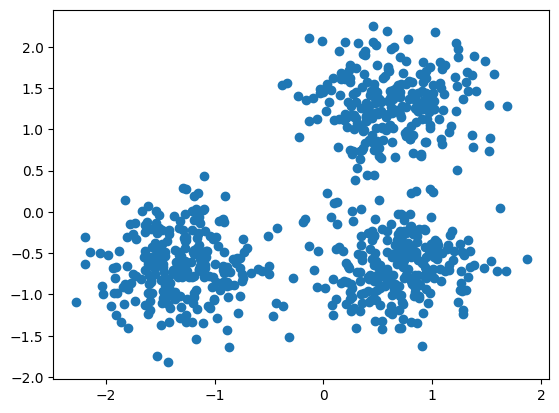

In [10]:
#visualisasi
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Compute DBSCAN

In [12]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


> * eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.
> * min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).
>* Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

## Evaluasi Kualitas Klasterisasi

In [14]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626



>* **Homogeneity** → apakah tiap klaster hanya berisi satu label asli.
>* **Completeness** → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.
>* **V-measure** → rata-rata harmonik dari homogeneity dan completeness.
>* **Adjusted  Rand Index (ARI)** → kesesuaian antara klasterisasi dengan label asli.
>* **Adjusted Mutual Information (AMI)** → kesamaan informasi antara klasterisasi dengan label asli.
>* **Silhouette Coefficient** → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

## Visualisasi Hasil Klasterisasi

> Kita akan memvisualisasikan hasil DBSCAN.

* Core sample ditampilkan dengan titik besar.
* Non-core sample ditampilkan dengan titik kecil.
* Noise ditampilkan dengan warna hitam.

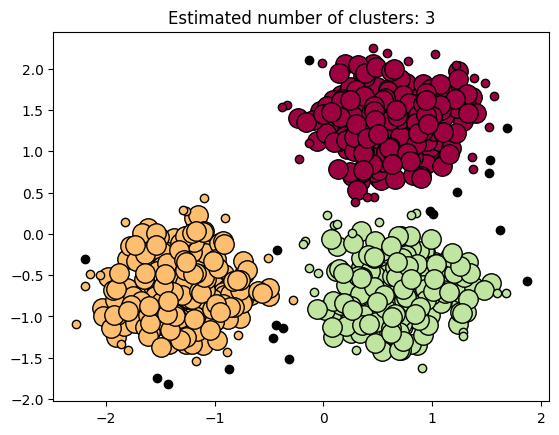

In [16]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

> 👉 Interpretasi visual:

* Titik besar berwarna → core samples dalam klaster.
* Titik kecil berwarna → non-core samples, tetap termasuk klaster.
* Titik hitam → noise/outlier.